### 构造神经网络模型对两条曲线数据点进行二分类，详细信息参考博客
https://huizhuzhao.github.io/2017/01/16/neural-networks-manifolds-topology.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
import keras
from keras.models import Sequential
from keras.layers import Dense

from jupyter_notebook.datasets.utils.data_utils import one_hot_transformer
from jupyter_notebook.datasets.base import Dataset
from jupyter_notebook.models.utils.training import train_model_keras

Using TensorFlow backend.


((200, 2), (200, 2))


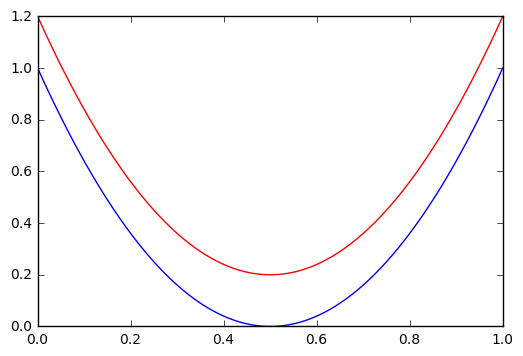

In [42]:
class QuadraticImporter():
    def __init__(self):
        pass
    
    def load_dataset(self):
        x = np.linspace(0, 1, 100)
        y1 = (2*(x-0.5))**2
        y2 = (2*(x-0.5))**2 + 0.2
    
        X_1 = np.c_[x, y1]    
        X_2 = np.c_[x, y2]
        y_1 = one_hot_transformer(np.ones_like(x), 2)
        y_2 = one_hot_transformer(np.zeros_like(x), 2)

        data = np.concatenate([X_1, X_2], axis=0)
        labels = np.concatenate([y_1, y_2], axis=0)
        self.data = [data]
        self.labels = labels
    
    def output(self):
        return self.data, self.labels

data_importer = QuadraticImporter()
dataset = Dataset()
dataset.load_importer(data_importer)
X, y = dataset.data[0], dataset.labels
print(X.shape, y.shape)
plt.plot(X[:100, 0], X[:100, 1])
plt.plot(X[100:, 0], X[100:, 1], 'r')
plt.show()

In [49]:
def build_model():
    model = Sequential()
    model.add(Dense(units=13, input_shape=(2, ), activation='relu')) # changing output_dim, you test different model
    #model.add(Dense(output_dim=3, activation='relu'))
    model.add(Dense(units=2, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def visualize_model(model, x_min, x_max, y_min, y_max, h):
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = np.reshape(zz.argmax(axis=1), xx.shape)
    
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y.argmax(axis=1), cmap=plt.cm.coolwarm)
    plt.show()

In [50]:
model = build_model()
train_X = np.repeat(X, 200, axis=0)
train_y = np.repeat(y, 200, axis=0)
print train_X.shape, train_y.shape
print model.input_shape, model.output_shape
print(model.summary())

(40000, 2) (40000, 2)
(None, 2) (None, 2)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 13)                39        
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 28        
Total params: 67.0
Trainable params: 67
Non-trainable params: 0.0
_________________________________________________________________
None


In [51]:
model.fit(train_X, train_y, epochs=20, batch_size=32)


Epoch 1/20
40000/40000 [==============================] - 0s - loss: 0.6516 - acc: 0.6001     
Epoch 2/20
40000/40000 [==============================] - 0s - loss: 0.6179 - acc: 0.6240     
Epoch 3/20
40000/40000 [==============================] - 0s - loss: 0.5929 - acc: 0.6939     
Epoch 4/20
40000/40000 [==============================] - 0s - loss: 0.5578 - acc: 0.7623     
Epoch 5/20
40000/40000 [==============================] - 0s - loss: 0.5021 - acc: 0.8099     
Epoch 6/20
40000/40000 [==============================] - 0s - loss: 0.4331 - acc: 0.8668     
Epoch 7/20
40000/40000 [==============================] - 0s - loss: 0.3653 - acc: 0.9293     
Epoch 8/20
40000/40000 [==============================] - 0s - loss: 0.3047 - acc: 0.9502     
Epoch 9/20
40000/40000 [==============================] - 0s - loss: 0.2505 - acc: 0.9623     
Epoch 10/20
40000/40000 [==============================] - 0s - loss: 0.2044 - acc: 0.9730     
Epoch 11/20
40000/40000 [========================

In [52]:
y_pred = model.predict(X)
fpr, tpr, threshold = roc_curve(np.argmax(y, axis=1), y_pred[:, 1])
roc_auc = auc(fpr, tpr)
roc_auc

1.0

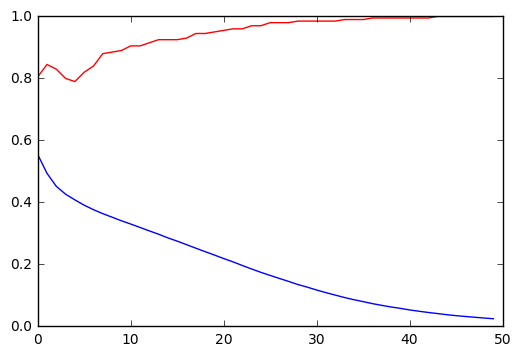

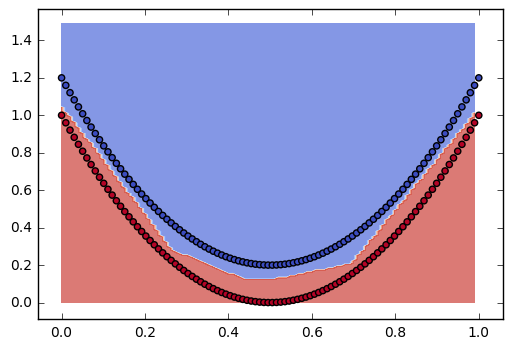

In [53]:
loss_metrics = loss_metrics_dict['train_loss_metrics']
loss_list = [x[0] for x in loss_metrics]
metrics_list = [x[1] for x in loss_metrics]
plt.plot(loss_list)
plt.plot(metrics_list, 'r')
plt.show()
visualize_model(model, 0, 1, 0, 1.5, 0.01)